In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.ensemble import AdaBoostClassifier
# in each enseble has classifire and regression 
# classifier gives us which cass it belongs and regression gives us abslute value 


In [3]:
df= pd.read_excel("Social_Network_Ads_new.xlsx")
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0
...,...,...,...
279,46,41000,1
280,51,23000,1
281,50,20000,1
282,36,33000,0


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
X=df.iloc[:,[0,1]]
Y=df.iloc[:,[2]]
print(X.shape,Y.shape)

(284, 2) (284, 1)


In [6]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sc, Y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(227, 2) (57, 2) (227, 1) (57, 1)


In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
model=AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=7)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

# base estimator and n_estimator is hyper parameter

c:\users\abc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8245614035087719

In [16]:
model.estimator_errors_

array([0.22026432, 0.22270777, 0.4069311 , 0.42944084, 0.39398226,
       0.43583017, 0.39525431])

In [17]:
model.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1.])

In [19]:
model.feature_importances_

array([0.57142857, 0.42857143])

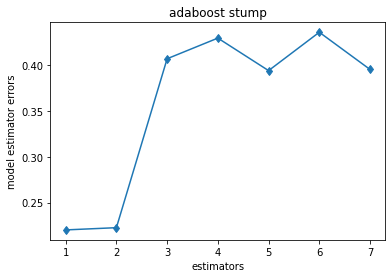

In [23]:
plt.plot(range(1,8),model.estimator_errors_,marker='d')
plt.xlabel('estimators')
plt.ylabel('model estimator errors')
plt.title('adaboost stump')
plt.show()

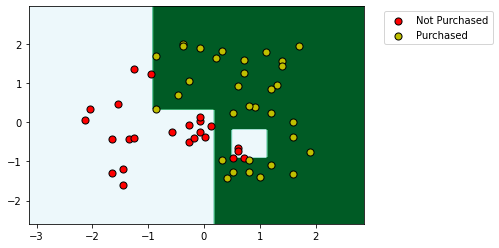

In [18]:
age_test = X_test[:,0]
sal_test = X_test[:,1]
X1, X2 = np.meshgrid(np.arange(age_test.min()-1, age_test.max()+1, 0.05),
           np.arange(sal_test.min()-1, sal_test.max()+1, 0.05))

test_instances = np.c_[X1.ravel(),X2.ravel()]

y_pred = model.predict(test_instances)

yp = model.predict(X_test)

plt.contourf(X1, X2, y_pred.reshape(X1.shape), cmap=plt.cm.BuGn)
plt.scatter(X_test[yp==0,0],
            X_test[yp==0,1], s = 50, 
            color='r', edgecolor='k', label="Not Purchased")
plt.scatter(X_test[yp==1,0],
            X_test[yp==1,1], s = 50, 
            color='y', edgecolor='k', label="Purchased")
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()